In [1]:
# Run this cell to import the packages you'll need and set a seed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Please dont change this--otherwise, you'll get different results from everyone else!
np.random.seed(1547)

df = pd.read_csv('datasets/income.csv', encoding='cp1252')

In [2]:
# Complete the two functions below.  
def get_sample(dataset, n=30):
    """Grabs a random subsample of size 'n' from dataset.
    Outputs the mean of the subsample."""
    _sum = 0
    dataset_size = len(dataset)
    for i in range(n):
        rnd_index = np.random.randint(low=0, high=dataset_size)
        _sum += dataset[rnd_index]
        
    return _sum / n

def create_sample_distribution(dataset, size=100):
    """Creates a dataset of subsample means.  The length of the dataset is specified by the 'size' 
    keyword argument. Should return the entire sample distribution as a numpy array.  """
    new_dataset = []
    for i in range(size):
        new_dataset.append(get_sample(dataset))
        
    return new_dataset

In [3]:
df.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


(array([12., 12., 13., 21., 14., 14.,  3.,  7.,  1.,  3.]),
 array([1.03333333, 1.07333333, 1.11333333, 1.15333333, 1.19333333,
        1.23333333, 1.27333333, 1.31333333, 1.35333333, 1.39333333,
        1.43333333]),
 <a list of 10 Patch objects>)

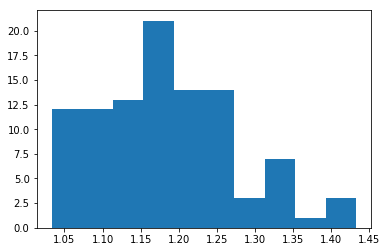

In [4]:

normal_income = create_sample_distribution(df.Mean.value_counts().values)
plt.hist(normal_income)

# Scipy

In [5]:
import scipy.stats as st

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
x = normal_income[10]
x

1.2

In [7]:
z_x = st.zscore(normal_income)[10]
z_x

0.21528273050881708

In [8]:
np.percentile(normal_income, 100)

1.4333333333333333

In [9]:
st.norm.cdf(z_x)

0.5852265534866866

In [10]:
st.norm.sf(z_x)

0.4147734465133134

In [11]:
# How much is the top 90%
z = np.percentile(normal_income, 80)
"Only {:.2f}% is the top 90%".format(st.norm.sf(z) * 100)

'Only 10.87% is the top 90%'

In [12]:
# what is the income at the 90 percentile
"At the 90th percentile, the mean income is ${:,.2f}".format(np.percentile(df.Mean, 90))

'At the 90th percentile, the mean income is $108,561.00'

In [13]:
# How much are the bottom 10%
z = np.percentile(normal_income, 10)
z_x = st.norm.sf(z_x)
"The bottom 10% is {:.2f}%".format(z_x * 100)

'The bottom 10% is 41.48%'

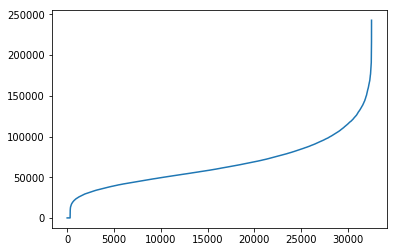

In [50]:
df.sort_values(by="Mean").Mean.plot(use_index=False)

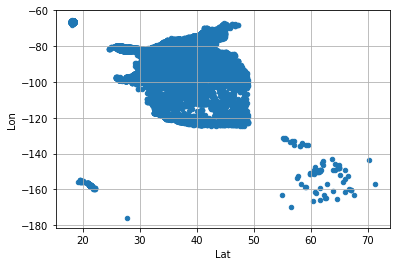

In [54]:
df.plot(kind='scatter', x='Lat', y='Lon', grid=True)